# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2)

In [22]:
# Load pickled data
import pickle
import cv2
import numpy as np

# TODO: fill this in based on where you saved the training and testing data
training_file ="../data/traffic-signs-data/train.p"
testing_file = "../data/traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [23]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = X_train.shape[0]

# TODO: number of testing examples
n_test = X_test.shape[0]

# TODO: what's the shape of an image?
image_shape = X_train.shape[1]

# TODO: how many classes are in the dataset
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Numbe...r of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Numbe...r of testing examples = 12630
Image data shape = 32
Number of classes = 43


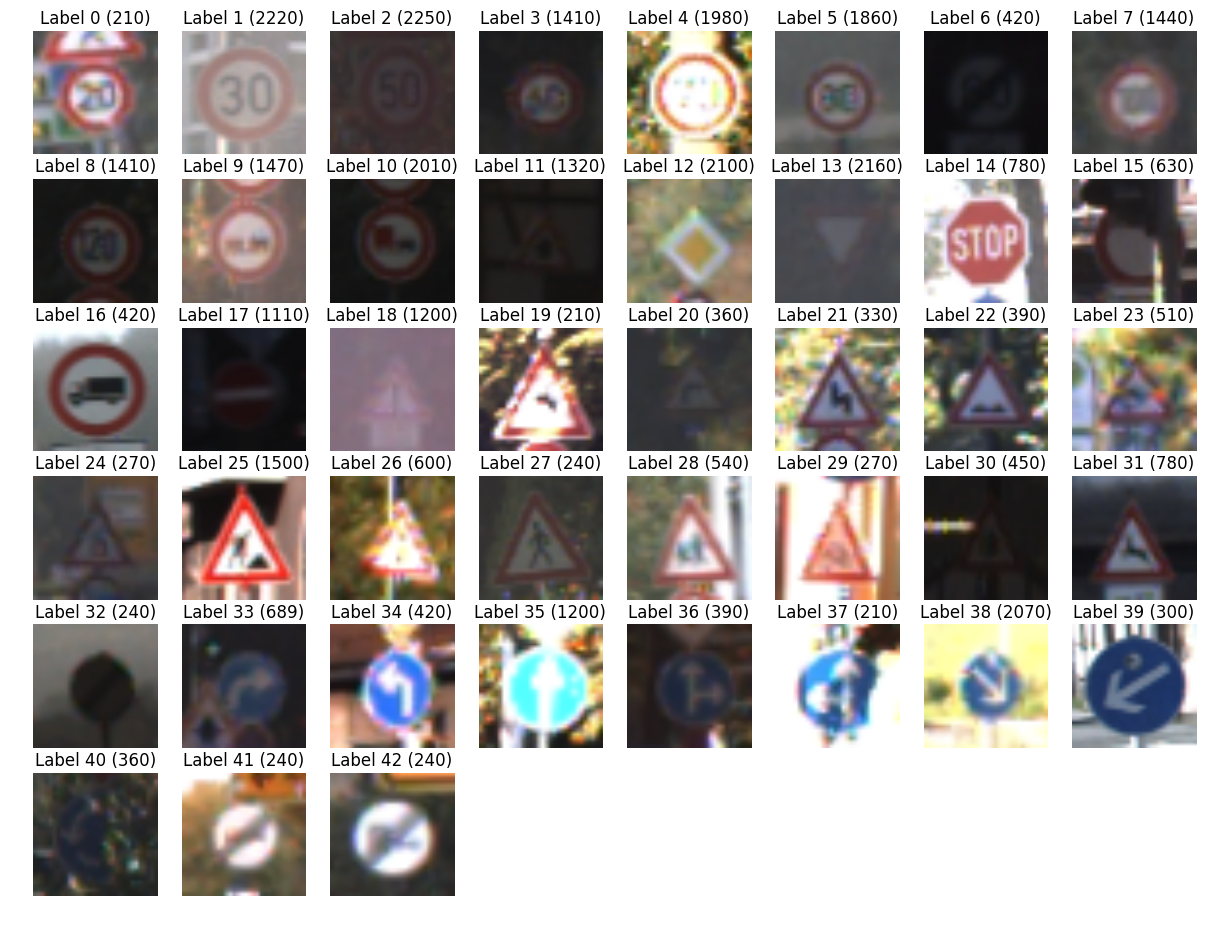

In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np

def display_images_and_labels(images, labels):
    """Display the first image of each label."""
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[np.argwhere(labels == label)[0]][0]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, np.sum(labels == label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()

display_images_and_labels(X_train,y_train)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [24]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
def normalization(image_data):
    return ((image_data)/255-0.5)*2

X_train_nol = normalization(X_train)
X_test_nol = normalization(X_test)

### Question 1 

_Describe the techniques used to preprocess the data._

Answer: Implemented Normalization to normalize the input image data into [0,1]

**Answer:**

In [4]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from PIL import Image
from PIL import ImageEnhance
import cv2
from sklearn.model_selection import train_test_split

def rotate(train_data):
    train_data_rotate = np.array(train_data)
    for index,image in enumerate(train_data):
       
        angle = (np.random.random(1)-0.5)*30 #random angle from -15 to 15
        im = Image.fromarray(image)
        rotated = im.rotate(angle)
        train_data_rotate[index,:,:,:] = rotated
    return (train_data_rotate)


def adjustScale(train_data):
    train_data_scale = np.array(train_data)
    for index,image in enumerate(train_data):
        (h, w) = image.shape[:2]
        scale = (np.random.random(1)-0.5)*6 #random angle from 0.9 to 1.1
        if scale>0:
            img_seg = cv2.resize(image,(h+scale,w+scale))
            img_sclaed = img_seg[scale/2:h-scale/2,scale/2:w-scale/2,:]
        else:
            img_seg = image[scale/2:h-scale/2,scale/2:w-scale/2,:]
        img_sclaed = cv2.resize(img_seg,(h,w))    
        train_data_scale[index,:,:,:] = img_sclaed
    return (train_data_scale)

def adjustBrightness(train_data):
    train_data_bright = np.array(train_data)
    for index,image in enumerate(train_data):
        factor = ((np.random.random(1)-0.5)/2)+1 #factor from 0.75 to 1.25 
        enhancer = ImageEnhance.Brightness(Image.fromarray(image))
        img_bright = enhancer.enhance(factor)
        train_data_bright[index,:,:,:] = img_bright
    return (train_data_bright)

def adjustContrast(train_data):
    train_data_contra = np.array(train_data)
    for index,image in enumerate(train_data):
        factor = ((np.random.random(1)-0.5)/2)+1 #factor from 0.75 to 1.25 
        enhancer = ImageEnhance.Contrast(Image.fromarray(image))
        img_contra = enhancer.enhance(factor)
        train_data_contra[index,:,:,:] = img_contra
    return (train_data_contra)


for label in set(y_train):
                num_each = np.sum(y_train == label)
                data_set = X_train[np.argwhere(y_train == label),:,:,:]
                data_set = np.reshape(data_set,(data_set.shape[0],data_set.shape[2],data_set.shape[3],data_set.shape[4]))
                
                if (num_each<1000):
                    data_rotate = rotate(data_set)
                    data_scale = adjustScale(data_set)
                    data_bright = adjustBrightness(data_set)
                    data_contra = adjustContrast(data_set)              
                    data_bright_rotae = adjustBrightness(data_rotate)
                    data_contra_rotae = adjustContrast(data_rotate)
                    data_augment =np.concatenate((data_rotate,data_scale,data_bright,data_contra,data_bright_rotae,data_contra_rotae), axis=0)
                    data_augment  = normalization(data_augment)
                    label_new = np.full((data_augment.shape[0],), label)
                    X_train_aug =  np.concatenate((X_train_nol,data_augment),axis=0)
                    y_train_aug = np.concatenate((y_train,label_new),axis=0)
                    
X_train_input, X_val, y_train_input, y_val = train_test_split(X_train_aug, y_train_aug, test_size=0.1, random_state=0)
X_test,y_test = X_test, y_test

/home/shangliy/anaconda2/envs/udacity/lib/python3.5/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/shangliy/anaconda2/envs/udacity/lib/python3.5/site-packages/ipykernel/__main__.py:27: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/shangliy/.local/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((1260,), 0) will return an array of dtype('uint8')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/home/shangliy/.local/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((2520,), 6) will return an array of dtype('uint8')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/home/shangliy/.local/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((4680,), 14)

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer: I split the original train set to the train data and validation data set. 90% of original data used to train and 10% of original data used to test.
I use the original test data set to do the test.

I generate the augmentation input images including rotate(-15,15),scale(0.9 to 1.1),adbrightness(.75,1.25),addcontrast(0.75,1.25)
The reason to do it includes two part: The first one to use augmentation to make the input images in different classes balance.  From the data visualization, we can see the input data is inbalanced , thus I use augamented images for the class set with small number to make each class with around 1500 images; The second part is to make the training more robust for image in different environment and relief the risk of overfitting. **

In [5]:
import numpy
import pickle
import tensorflow as tf
numpy.random.seed(10)


def create_weight_variables(shape, seed, name, use_gpu=False):
    """
    Create gaussian random neurons with mean 0 and std 0.1
    **Paramters**
      shape: Shape of the layer
    """

    #import ipdb; ipdb.set_trace()

    if len(shape) == 4:
        in_out = shape[0] * shape[1] * shape[2] + shape[3]
    else:
        in_out = shape[0] + shape[1]

    import math
    stddev = math.sqrt(3.0 / in_out) # XAVIER INITIALIZER (GAUSSIAN)

    initializer = tf.truncated_normal(shape, stddev=stddev, seed=seed)

    if use_gpu:
        with tf.device("/gpu"):
            return tf.get_variable(name, initializer=initializer, dtype=tf.float32)
    else:
        with tf.device("/cpu"):
            return tf.get_variable(name, initializer=initializer, dtype=tf.float32)


def create_bias_variables(shape, name, use_gpu=False):
    """
    Create the bias term
    """
    initializer = tf.constant(0.1, shape=shape)

    if use_gpu:
        with tf.device("/gpu"):
            return tf.get_variable(name, initializer=initializer, dtype=tf.float32)
    else:
        with tf.device("/cpu"):
            return tf.get_variable(name, initializer=initializer, dtype=tf.float32)

def create_conv2d(x, W):
    """
    Create a convolutional kernel with 1 pixel of stride
    **Parameters**
        x: input layer
        W: Neurons
    """
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')


def create_max_pool(x):
    """
    Create max pooling using a patch of 2x2
    **Parameters**
        x: input layer
    """
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')


def create_tanh(x, bias):
    """
    Create the Tanh activations
    **Parameters**
        x: input layer
        bias: bias term
    """
    return tf.nn.tanh(tf.nn.bias_add(x, bias))


def create_relu(x, bias):
    """
    Create the ReLU activations
    **Parameters**
        x: input layer
        bias: bias term
    """
    return tf.nn.relu(tf.nn.bias_add(x, bias))


def create_sigmoid(x, bias):
    """
    Create the Sigmoid activations
    **Parameters**
        x: input layer
        bias: bias term
    """

    return tf.nn.sigmoid(tf.nn.bias_add(x, bias))

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
class model(object):

    def __init__(self,
                 conv1_kernel_size=3,
                 conv1_output=32,

                 conv2_kernel_size=3,
                 conv2_output=64,

                 fc1_output=200,
                 n_classes=43,

                 seed=10, image_size =[32,32,3], use_gpu = False):
        """
        Create all the necessary variables for this CNN
        **Parameters**
            conv1_kernel_size=3
            conv1_output=32,
            conv2_kernel_size=3,
            conv2_output=64,
            fc1_output=200,
            n_classes=43
            seed = 10
        """
        # First convolutional
        self.W_conv1 = create_weight_variables([conv1_kernel_size, conv1_kernel_size, image_size[2], conv1_output], seed=seed, name="W_conv1", use_gpu=use_gpu)
        self.b_conv1 = create_bias_variables([conv1_output], name="bias_conv1", use_gpu=use_gpu)

        # Second convolutional
        self.W_conv2 = create_weight_variables([conv2_kernel_size, conv2_kernel_size, conv1_output, conv2_output], seed=seed, name="W_conv2", use_gpu=use_gpu)
        self.b_conv2 = create_bias_variables([conv2_output], name="bias_conv2", use_gpu=use_gpu)

        # First fc
        self.W_fc1 = create_weight_variables([(image_size[0] // 4) * (image_size[1] // 4) * conv2_output+((image_size[0] // 2) * (image_size[1] // 2) * conv1_output), fc1_output], seed=seed, name="W_fc1", use_gpu=use_gpu)
        self.b_fc1 = create_bias_variables([fc1_output], name="bias_fc1", use_gpu=use_gpu)

        # Second FC fc
        self.W_fc2 = create_weight_variables([fc1_output, n_classes], seed=seed, name="W_fc2", use_gpu=use_gpu)
        self.b_fc2 = create_bias_variables([n_classes], name="bias_fc2", use_gpu=use_gpu)

        self.seed = seed

    def create_network(self, data, train=True):
        """
        Create the Lenet Architecture
        **Parameters**
          data: Input data
          train:
        **Returns
          features_back: Features for backpropagation
          features_val: Features for validation
        """

        # Creating the architecture
        # First convolutional
        with tf.name_scope('conv_1') as scope:
            conv1 = create_conv2d(data, self.W_conv1)
        # relu1 = create_relu(conv1, self.b_conv1)
        # relu1 = create_sigmoid(conv1, self.b_conv1)

        with tf.name_scope('tanh_1') as scope:
            tanh_1 = create_tanh(conv1, self.b_conv1)


        # Pooling
        # pool1 = create_max_pool(relu1)
        # pool1 = create_max_pool(relu1)
        with tf.name_scope('pool_1') as scope:
            pool1 = create_max_pool(tanh_1)


        # Second convolutional
        with tf.name_scope('conv_2') as scope:
            conv2 = create_conv2d(pool1, self.W_conv2)
        # relu2 = create_relu(conv2, self.b_conv2)
        # relu2 = create_sigmoid(conv2, self.b_conv2)


        with tf.name_scope('tanh_2') as scope:
            # pool2 = create_max_pool(relu2)
            #tanh_2 = create_relu(conv2, self.b_conv2)
            # pool2 = create_max_pool(conv2)
            tanh_2 = create_tanh(conv2, self.b_conv2)

        # Pooling
        with tf.name_scope('pool_2') as scope:
            pool2 = create_max_pool(tanh_2)


        #if train:
            #pool2 = tf.nn.dropout(pool2, 0.5, seed=self.seed)

        # Reshaping all the convolved images to 2D to feed the FC layers
        # FC1
        with tf.name_scope('fc_1') as scope:
            pool1_shape = pool1.get_shape().as_list()
            reshape1 = tf.reshape(pool1, [pool1_shape[0], pool1_shape[1] * pool1_shape[2] * pool1_shape[3]])
            pool2_shape = pool2.get_shape().as_list()
            reshape2 = tf.reshape(pool2, [pool2_shape[0], pool2_shape[1] * pool2_shape[2] * pool2_shape[3]])
            reshape = tf.concat(1,[reshape1,reshape2])
            #fc1 = tf.nn.relu(tf.matmul(reshape, self.W_fc1) + self.b_fc1)
            fc1 = tf.nn.tanh(tf.matmul(reshape, self.W_fc1) + self.b_fc1)

        #if train:
            #fc1 = tf.nn.dropout(fc1, 0.5, seed=self.seed)

        # FC2
        with tf.name_scope('fc_2') as scope:
            fc2 = tf.matmul(fc1, self.W_fc2) + self.b_fc2
            #fc2 = tf.nn.softmax(tf.matmul(fc1, self.W_fc2) + self.b_fc2)

        return fc2


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer: My model contains two convolution layers , two pool layer and two full connected layers. It use tanh as activation function.
The first layer is convolution layer. It takes the image data as input, windows size : 3 by 3. Stride: 1 by 1. Depth: 32;
After the convolution and add bias, the output(32,32,32) fo through activationfunction(tanh).
Then the output((32,32,32)) go through pool layer. The poor layer uses max pool with parameter ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1]. The output with size(16,16,32)
The second layer is also convolution layer. It takes  the output of first pool layer (16,16,32) data as input, windows size : 3 by 3. Stride: 1 by 1. Depth: 64; It generates results with size (16,16,64)
Then after the same activation and second pool layer, th second output layer generates data with size(8,8,64);
After that, the data come into the first connected layer, the data is first flatted with size(8*8*64,), the weight inside the full connected layer is (8*8*64,200) and bias (200,). By multiple the input and weights as well as add bias. Then, the output go through the activation function(200,);
Then the output enter the final classify layer(full connected), it comes with the weights (200,num_class),num_class =43, and bias (num_class,). After multiplication and add, the final layer generates the output(num_class,) representing the probability of each class.


**

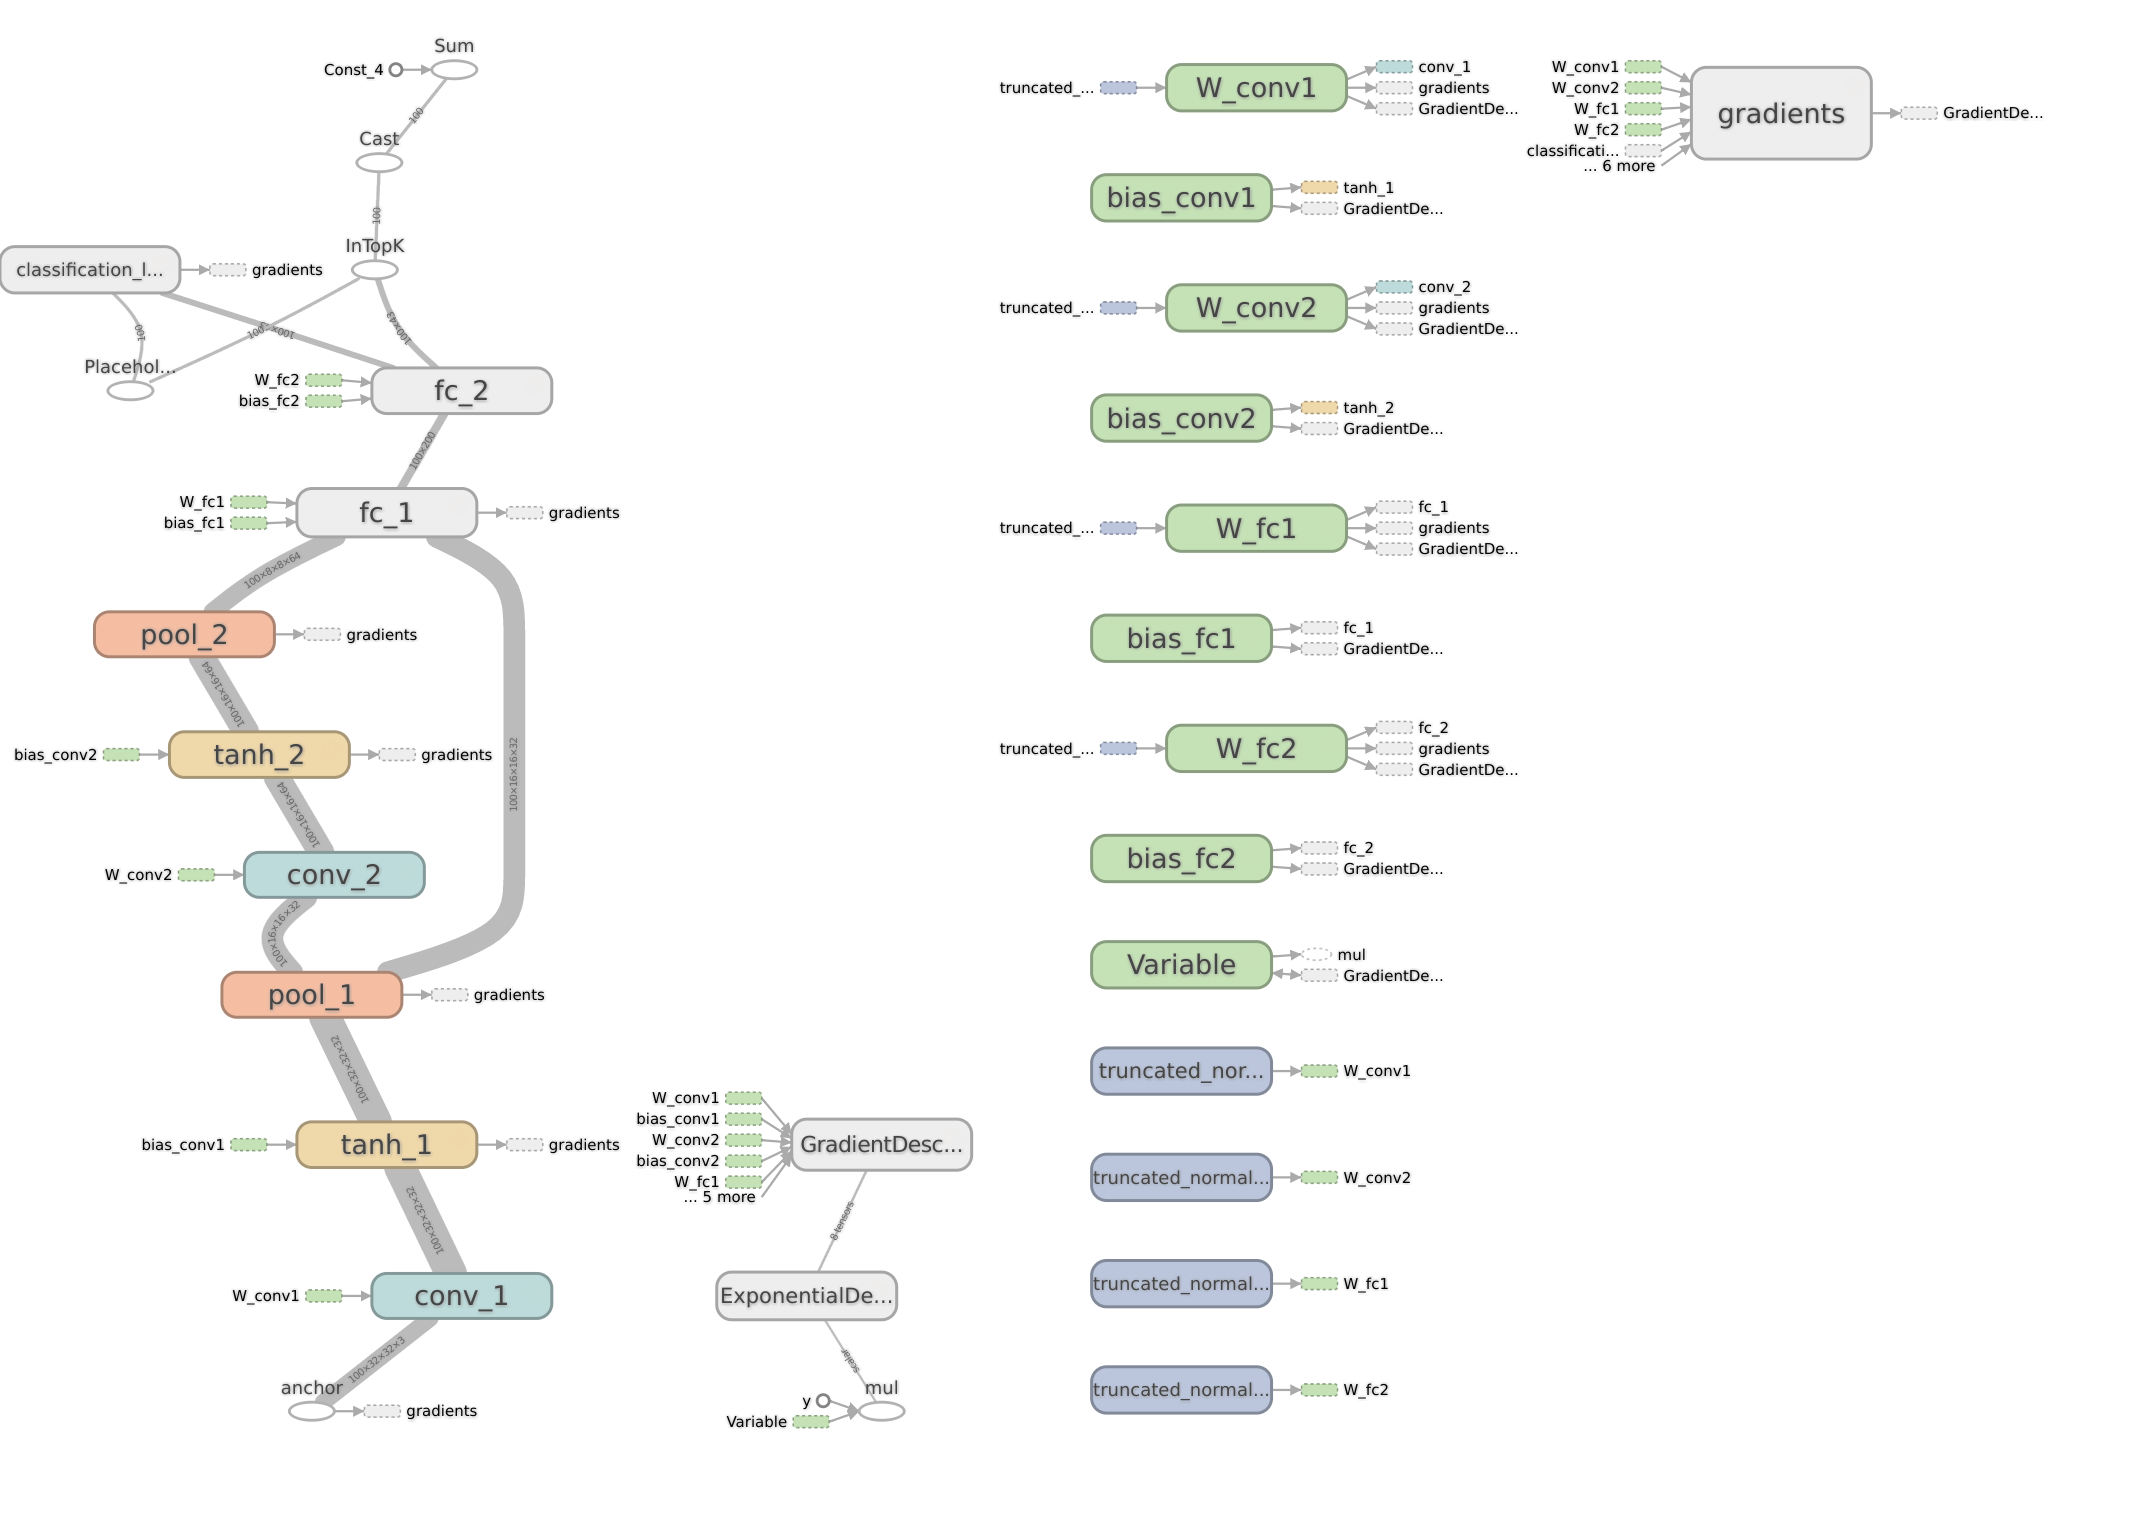

In [5]:
from IPython.display import Image
Image(filename="model.png")


In [7]:



### Train your model here.
### Feel free to use as many code cells as needed.

from tensorflow.python.platform import gfile
from tensorflow.python.framework import graph_util

BATCH_SIZE = 100
ITERATIONS = 10000
VALIDATION_TEST = 100
IMAGE_SIZE = [32, 32, 3]
SEED = 10 
CLASS_NUMS = n_classes


def classification_loss(logits, labels):
    """
    Compute the classification loss
    """
    with tf.name_scope("classification_loss"):
        labels = tf.to_int64(labels)
        cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits, labels, name='xentropy')
        loss = tf.reduce_mean(cross_entropy, name='xentropy_mean')

    return loss

def evaluation(logits, labels):
    correct = tf.nn.in_top_k(logits, labels, 1)
    return tf.reduce_sum(tf.cast(correct, tf.int32))

def do_eval(sess,
            eval_correct,
            num_examples,
            feed_dict):
  # And run one epoch of eval.
  true_count = 0  # Counts the number of correct predictions.
  #steps_per_epoch = data_set.num_examples  // FLAGS.batch_size
  true_count = sess.run(eval_correct, feed_dict=feed_dict)
  precision = true_count / num_examples
  print('  Num examples: %d  Num correct: %d  Precision: %0.04f' %
        (num_examples, true_count, precision))


train_anchor_data = tf.placeholder(tf.float32, shape=(BATCH_SIZE, IMAGE_SIZE[0], IMAGE_SIZE[1], IMAGE_SIZE[2]), name="anchor")
labels_anchor = tf.placeholder(tf.int32, shape=BATCH_SIZE)

cnn_model = model(seed=SEED,image_size=IMAGE_SIZE,n_classes=CLASS_NUMS)
train_anchor = cnn_model.create_network(train_anchor_data,)


loss =  classification_loss(train_anchor, labels_anchor)

# Defining training parameters
batch = tf.Variable(0)
learning_rate = tf.train.exponential_decay(
        0.01, # Learning rate
        batch * BATCH_SIZE,
        X_train_input.shape[0],
        0.97 # Decay step
)

    
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=batch)

eval_correct = evaluation(train_anchor, labels_anchor)

# Training
with tf.Session() as session:
        train_writer = tf.train.SummaryWriter('./logs_tensorboard/triplet/train',session.graph)

        test_writer = tf.train.SummaryWriter('./logs_tensorboard/triplet/test',session.graph)

        tf.scalar_summary('lr', learning_rate)
        tf.scalar_summary('loss', loss)

        merged = tf.merge_all_summaries()

        tf.initialize_all_variables().run()
        
        for step in range(ITERATIONS):
            
            train_index = np.random.randint(X_train_input.shape[0], size=BATCH_SIZE)
            batch_anchor = X_train_input[train_index, :,:,:]
            batch_labels_anchor = y_train_input[train_index]
            
            feed_dict = {
                            train_anchor_data: batch_anchor,
                            labels_anchor: batch_labels_anchor,
                         }


            _, l, lr, summary = session.run([optimizer, loss, learning_rate, merged],
                                                feed_dict=feed_dict)
            train_writer.add_summary(summary, step)

            if step % VALIDATION_TEST == 0:
               
                train_index = np.random.randint( X_val.shape[0], size=BATCH_SIZE)
                batch_anchor =  X_val[train_index, :,:,:]
                batch_labels_anchor =y_val[train_index]
                
                
                feed_dict = {
                                train_anchor_data: batch_anchor,
                                labels_anchor: batch_labels_anchor,
                    }
                lv, summary = session.run([loss, merged], feed_dict=feed_dict)
                test_writer.add_summary(summary, step)
                print('Validation Data Eval:')
                print("Step {0}:Loss Validation {1}".format(step,lv))
                
                do_eval(session,eval_correct,BATCH_SIZE,feed_dict)

                test_index = np.random.randint(X_test_nol.shape[0], size=100)
                batch_data_test = X_test_nol[test_index, :,:,:]
                batch_labels_test = y_test[test_index]

                
                feed_dict = {
                                train_anchor_data:  batch_data_test,
                                labels_anchor: batch_labels_test,
                    }
                lv, summary = session.run([loss, merged], feed_dict=feed_dict)
                test_writer.add_summary(summary, step)
                print('Test Data Eval:')
                print("Step {0}:Loss Validation {1}".format(step,lv))              
                do_eval(session,eval_correct,BATCH_SIZE,feed_dict)

        output_graph_def = graph_util.convert_variables_to_constants(session, session.graph_def, ['fc_2/add'])
        with gfile.FastGFile('./train.pb', 'wb') as f:
                f.write(output_graph_def.SerializeToString())

Validation Data Eval:
Step 0:Loss Validation 3.542952537536621
  Num examples: 100  Num correct: 11  Precision: 0.1100
Test Data Eval:
Step 0:Loss Validation 3.7243523597717285
  Num examples: 100  Num correct: 9  Precision: 0.0900
Validation Data Eval:
Step 100:Loss Validation 2.3741321563720703
  Num examples: 100  Num correct: 39  Precision: 0.3900
Test Data Eval:
Step 100:Loss Validation 2.4217846393585205
  Num examples: 100  Num correct: 35  Precision: 0.3500
Validation Data Eval:
Step 200:Loss Validation 1.8786286115646362
  Num examples: 100  Num correct: 56  Precision: 0.5600
Test Data Eval:
Step 200:Loss Validation 2.0347392559051514
  Num examples: 100  Num correct: 45  Precision: 0.4500
Validation Data Eval:
Step 300:Loss Validation 1.7000818252563477
  Num examples: 100  Num correct: 58  Precision: 0.5800
Test Data Eval:
Step 300:Loss Validation 1.7201085090637207
  Num examples: 100  Num correct: 60  Precision: 0.6000
Validation Data Eval:
Step 400:Loss Validation 1.36420

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer: optimizer :GradientDescentOptimizer (stotastic gradient decent); batch_size: 100; epochs: 10000;
Learning rate : start with 0.7, based on btach_size and 0.97 paramter do decay.       
)**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer: First,follow the structure in tensorflow tutorial detecting MNIST; Then, take the recommended paper as reference to decide the detail in layer, for example: units number, window size; Finally, fine-tunning the parameter, print the loss for validation each 100 images, considering for my CPU, it takes long time to do the trainning , so I start with small epoches and observe the loss status, for example,  if it go to inf, it means that our learning rate too large. And I also use learning rate decay to relief this part kind of**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

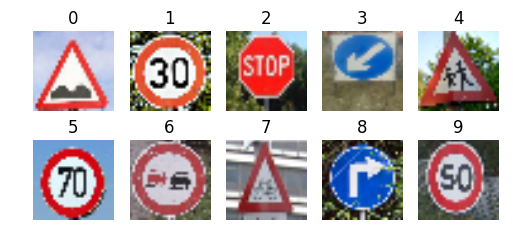

In [55]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
test_dir = "./test"

img_set = glob.glob(test_dir+"/*.jpg")
img_array = np.zeros((len(img_set),32,32,3))
for index, img in enumerate(img_set):
    imag_ori = cv2.imread(img)
    resize = cv2.resize(imag_ori,(32,32))
    cv2.imshow('cd',resize)
    
    img_RGB = cv2.cvtColor(resize ,cv2.COLOR_BGR2RGB)
    
   
    
    img_array[index,:,:,:] = (np.asarray(img_RGB,dtype="int"))
    
    
    
    plt.subplot(3, 5, index+1)
    plt.title(str(index))
   
    plt.axis('off')
        
    _ = plt.imshow(img_RGB)
plt.show()

    
    
    
    

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer: Most images are OK, but the blurry in index 7 and 8 could make the prediction harder. For index 3, the sign is not at the center and almost half of the images is background, which is different from our training image. It may make model confusion makeing prediction.**

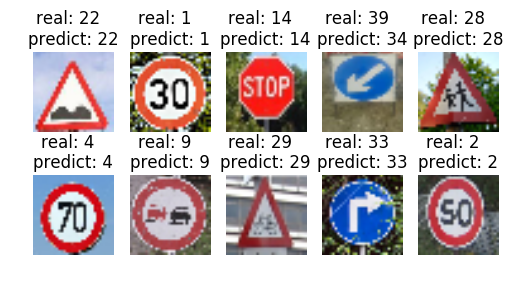

the test accuracy is we get 9 correct results of total 10input results
the accuracy is 0.9


In [33]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

label_keyword = ["Speed limit (20km/h)","Speed limit (30km/h)","Speed limit (50km/h)","Speed limit (60km/h)","Speed limit (70km/h)",
"Speed limit (80km/h)","End of speed limit (80km/h)","Speed limit (100km/h)","Speed limit (120km/h)","No passing","No passing for vechiles over 3.5 metric tons","Right-of-way at the next intersection","Priority road","Yield","Stop","No vechiles","Vechiles over 3.5 metric tons prohibited","No entry","General caution","Dangerous curve to the left",
"Dangerous curve to the right","Double curve","Bumpy road","Slippery road","Road narrows on the right","Road work","Traffic signals","Pedestrians",
 "Children crossing","Bicycles crossing","Beware of ice/snow","Wild animals crossing","End of all speed and passing limits","Turn right ahead","Turn left ahead","Ahead only","Go straight or right","Go straight or left","Keep right","Keep left","Roundabout mandatory","End of no passing","End of no passing by vechiles over 3.5 metric tons"
]

graph_path = "./train.pb"
input_tensor = 'anchor:0'
output_tensor = 'fc_2/add:0'
######################################################################
# Unpersists graph from file
with tf.gfile.FastGFile(graph_path, 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    _ = tf.import_graph_def(graph_def, name='')
#####################################################################
num = 0
truth = 0
with tf.Session() as sess:
    
    for index, img in enumerate(img_set):
        imag_ori = cv2.imread(img)
        resize = cv2.resize(imag_ori,(32,32))
        cv2.imshow('cd',resize)

        img_RGB = cv2.cvtColor(resize ,cv2.COLOR_BGR2RGB)
        inputs = np.zeros((100,32,32,3),dtype= "float32")
        for i in range(100):
            inputs[i] = normalization(img_RGB)
        ###################################################################
            #Input data from images
        ###################################################################
        out_tensor = sess.graph.get_tensor_by_name(output_tensor)
        output = sess.run([out_tensor], {input_tensor: inputs})
        
        labels = output[0][0]
        final_label = np.argmax(labels)
        plt.subplot(3, 5, index+1)
        plt.subplots_adjust(top=1)
        plt.axis('off')
        real_label = img[img.rfind('_')+1:-4]
        title = "real: "+str(real_label) +"  \npredict: "+str(final_label)
        _ = plt.imshow(img_RGB)
        plt.title(title)
        num = num + 1
        if (final_label == int(real_label)):
            truth += 1
        #print(img)
        #print(final_label)
   
    plt.show( )
    print ("the test accuracy is we get "+ str(truth)+ " correct results of total "+ str(num) + "input results")
    acc = (float)(truth/num)
    print ("the accuracy is "+ str(acc))
   
    
    

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_



**Answer: The result perform OK on the image from website. Fot the missclassified results, we can compare my input with the train data, the background affects the performmance. It reminds me that out model have high dependence on whether out image remove most of non-necessary background information**

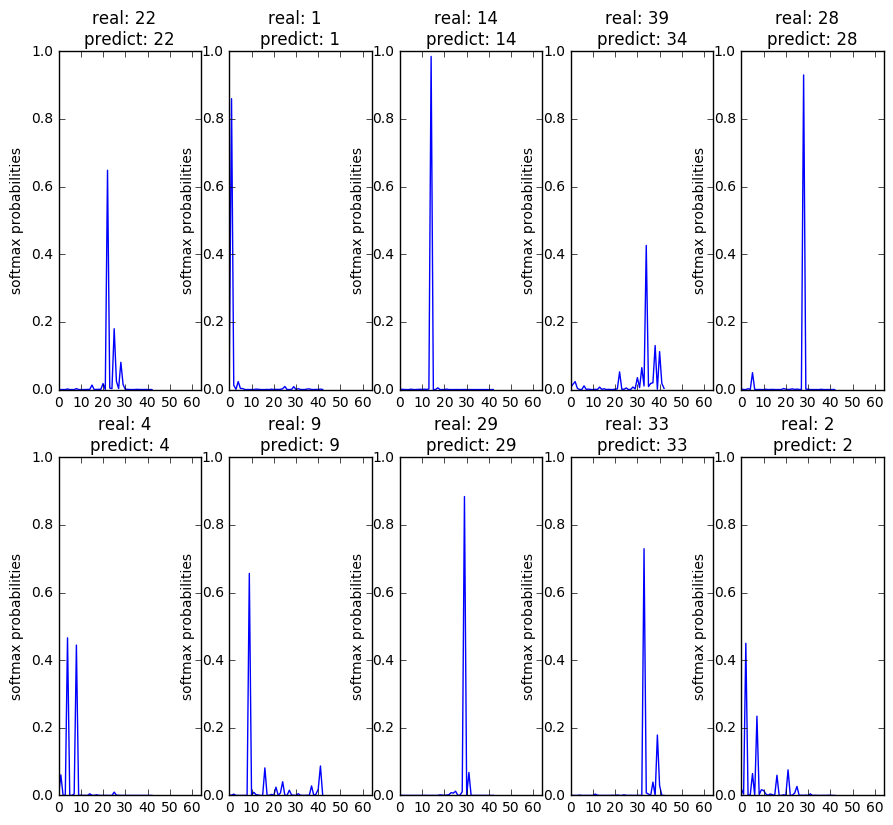

In [53]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
### Run the predictions here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

graph_path = "./train.pb"
input_tensor = 'anchor:0'
output_tensor = 'fc_2/add:0'
######################################################################
# Unpersists graph from file
with tf.gfile.FastGFile(graph_path, 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    _ = tf.import_graph_def(graph_def, name='')
#####################################################################
with tf.Session() as sess:
    for index, img in enumerate(img_set):
            imag_ori = cv2.imread(img)
            resize = cv2.resize(imag_ori,(32,32))
            cv2.imshow('cd',resize)

            img_RGB = cv2.cvtColor(resize ,cv2.COLOR_BGR2RGB)
            inputs = np.zeros((100,32,32,3),dtype= "float32")
            for i in range(100):
                inputs[i] = normalization(img_RGB)
            ###################################################################
                #Input data from images
            ###################################################################
            out_tensor = sess.graph.get_tensor_by_name(output_tensor)
            output = sess.run([out_tensor], {input_tensor: inputs})
            real_label = img[img.rfind('_')+1:-4]
            labels = output[0][0]
            sofmax_out =  softmax(labels)
            
            final_label = np.argmax(labels)
            plt.subplots_adjust( right=1.5 )
            plt.subplots_adjust(top=3)
            title = "real: "+str(real_label) +"  \npredict: "+str(final_label)
            plt.subplot(3, 5, index+1)
            plt.axis([0, 64, 0,1])
            bin_s = range(64)
            plt.plot(sofmax_out)
            plt.title(title)
            plt.ylabel('softmax probabilities')
    plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:
The predictions which model is certain includes the index1 with classid 22, index 2 with classid1, index 3 with classid14, index 5 with classid 28, index 7 with classid 9 , index 8 with class id 29, index 9 with class id 33 . For these instances show obviours higher probabilty on its prediction;
For index 10 with class id 2, it is kind of certain. There is reasonable difference between the prediction and second larger one;
For index 6, the model is uncertain about, it got two high probability, it make confusion on the prediction on these two class;
For index 4, model made wrong prediction, but the target  is within the top 5(rank 3)**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:
After triaining finish, I at first transform all variables to constant and decide the output op, then cut the graph and save the model to new ".pb" . 
        output_graph_def = graph_util.convert_variables_to_constants(session, session.graph_def, ['fc_2/add'])
        with gfile.FastGFile('./train.pb', 'wb') as f:
                f.write(output_graph_def.SerializeToString())
Then, every time when we want to load model and classify image, we can load the pb file, it will bring graph as well as parameters.
    with tf.gfile.FastGFile(graph_path, 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    _ = tf.import_graph_def(graph_def, name='')
We then decide the input tensor and output tensor, use feed and see.run to get the output prediction.
    input_tensor = 'anchor:0'
    output_tensor = 'fc_2/add:0
    ----
    out_tensor = sess.graph.get_tensor_by_name(output_tensor)
     output = sess.run([out_tensor], {input_tensor: inputs})
*

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.